# Pre-Processing Moderate+ (MODG) Reports

This notebook follows some of the same process as previous notebooks, but uses moderate or greater reports (MODG). This follows some of the methodologies of this paper:

Notebook contents:

## Import and Install Packages

In [1]:
!pip install -q cartopy

import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

## Filter for MODG Reports and Download

In [3]:
# pull in previously downloaded data

path = './pirep_downloads/'

df = pd.read_csv(path + 'all_pireps.csv', usecols = ['VALID', 'REPORT', 'TURBULENCE', 'LAT', 'LON', 'DateTime', 'Intensity', 'CAT?', 'FlightLevels', 'Dec_hr'])
total_num = len(df)
df[1:10]

ValueError: Usecols do not match columns, columns expected but not found: ['Dec_hr', 'CAT?', 'Intensity', 'FlightLevels', 'DateTime']

In [3]:
# remove none/smooth (0) and light (1) turbulence intensities
df.drop(df[df['Intensity'] <= 1].index, inplace=True)
modg_totals = print(len(df))
df[1:30]

2533169


,VALID,REPORT,TURBULENCE,LAT,LON,DateTime,FlightLevels,Intensity,CAT?,Dec_hr
1,200301010014,DAG UA /OV DAG-L26/TM 0014/FL125/TP AC14/TB LG...,LGT-MOD BLW 100 DURGC DAG,34.611805,-117.047915,2003-01-01 00:14:00,125,2,False,0.233333
3,200301010015,ONL UA /OV ONL 229060/TM 0015/FL370/TP A320/TB...,LGT-MOD CHOP,41.813608,-99.711292,2003-01-01 00:15:00,370,2,False,0.250000
5,200301010030,CYS UA /OV CYS 101023/TM 0030/FL260/TP E120/TB...,MOD CHOP,41.082491,-104.310658,2003-01-01 00:30:00,260,2,False,0.500000
6,200301010031,CYS UA /OV CYS 090025/TM 0031/FL270/TP E120/TB...,LGT-MOD CHOP,41.155640,-104.257028,2003-01-01 00:31:00,270,2,False,0.516667
7,200301010033,BNO UA /OV REO 260045/TM 0033/FL330/TP B733/TB...,MOD CHOP,42.460313,-118.867777,2003-01-01 00:33:00,330,2,False,0.550000
9,200301010034,ANW UA /OV ANW 270020/TM 0034/FL310/TP A320/TB...,CONT LGT OCNL MOD CHOP,42.579230,-100.445695,2003-01-01 00:34:00,310,2,False,0.566667
10,200301010035,EKO UA /OV BAM/TM 0035/FL350/TP SVRL ACFT/TB O...,OCNL MOD,40.599000,-116.874300,2003-01-01 00:35:00,350,2,False,0.583333
12,200301010043,MCK UA /OV HCT/TM 0043/FL370/TP A320/TB LGT-MO...,LGT-MOD,40.450000,-100.920000,2003-01-01 00:43:00,370,2,False,0.716667
14,200301010050,RIV UUA /OV F70/TM 0050/FL072/TP BL26/TB MOD O...,MOD OCNL SEV DURGC OVR RIDGELINE FM F70,33.574200,-117.128500,2003-01-01 00:50:00,72,3,False,0.833333
16,200301010059,U24 UA /OV DTA 245025/TM 0059/FL250/TP B733/TB...,MOD,39.204495,-112.996295,2003-01-01 00:59:00,250,2,False,0.983333


In [4]:
# save as one CSV
dataDir = './updated_CSVs'
output_dir = Path('./updated_CSVs')

# check if directory exists -> if directory doesn't exist, directory is created
if not os.path.exists(dataDir):
    os.mkdir(dataDir)
    
# download 
df.to_csv(output_dir / "csv_modg_all.csv")
print("Downloaded")

Downloaded


## MODG+ Flight Levels

Similar to the previous notebooks, let's break up each flight level and download each as a csv file.

In [5]:
# separate into individual dataframes and download as CSVs

low_modg = df[(df['FlightLevels'] >= 0o000) & (df['FlightLevels'] <= 149)]
low = len(low_modg)
low_modg.to_csv(output_dir / "low_fl_modg.csv")

med_modg = df[(df['FlightLevels'] >= 150) & (df['FlightLevels'] <= 299)]
med = len(med_modg)
med_modg.to_csv(output_dir / "med_fl_modg.csv")

high_modg = df[(df['FlightLevels'] >= 300)]
high = len(high_modg)
high_modg.to_csv(output_dir / "high_fl_modg.csv")

other = df[(df['FlightLevels'] == -1)]
other = len(other)
new_tot = len(df)

print("low:", low, ",", "med:", med, ",", "high:", high, "unk/other:", other, "total:", new_tot)

low: 888786 , med: 518508 , high: 1125875 unk/other: 0 total: 2533169


[44.445317308083276, 20.468748828048977, 35.085933863867744]


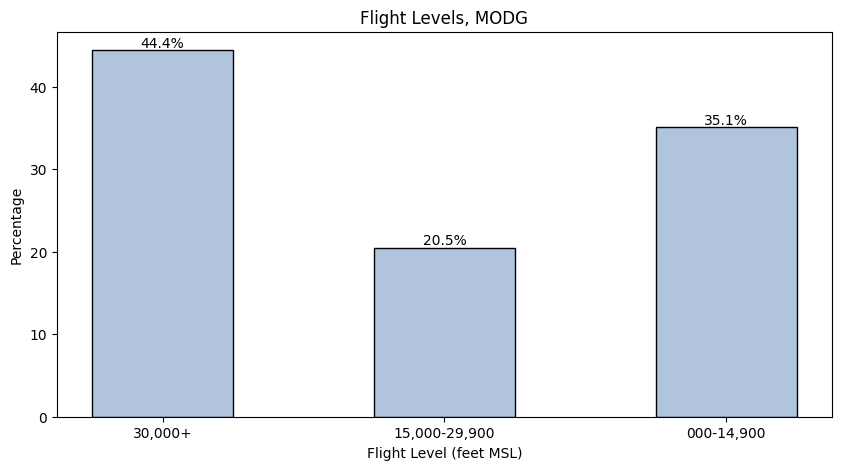

In [41]:
# create bar chart

fl = [high, med, low]
level = ["30,000+", "15,000-29,900", "000-14,900"]

percent = [(num/new_tot)*100 for num in fl]
print(percent)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
fl_modg_bar = plt.bar(level, percent, color ='lightsteelblue', ec='black', width = 0.5)

for rect in fl_modg_bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.1f}' "%", ha='center', va='bottom')
 
plt.xlabel("Flight Level (feet MSL)")
plt.ylabel("Percentage")
plt.title("Flight Levels, MODG")
plt.show()
    
plt.show()

## CAT in MODG Reports

In [22]:
cat_pres = df[df['CAT?'] == "True"]
cat_pres = len(cat_pres)
cat_not = df[df['CAT?'] == "False"]
cat_not = len(cat_not)

print("CAT reported:", cat_pres, ",", "CAT not reported:", cat_not)

# getting percentages for each category
x = [cat_pres, cat_not]
y = ["CAT reported", "CAT not reported"]

modg_cat = [(val/modg_totals)*100 for val in x]
print(modg_cat)

# bar chart
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(y, modg_cat, color ='blue', width = 0.5)
 
plt.xlabel("CAT reports")
plt.ylabel("Percentage")
plt.title("Existence of CAT in MODG reports")
plt.show()
    
plt.show()  

CAT reported: 0 , CAT not reported: 0


TypeError: unsupported operand type(s) for /: 'int' and 'NoneType'

## Density Maps per FL

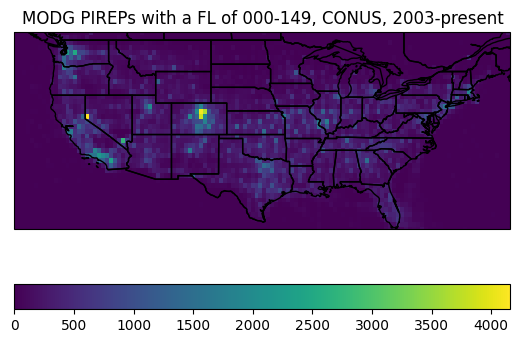

In [14]:
# "low" flight level
# pull lats and lons
low_lons = low_modg.LON
low_lats = low_modg.LAT

low_lats = np.array(low_lats.values, dtype='float')
low_lons = np.array(low_lons.values, dtype='float')

# create bins
xbins_conus = np.arange(-129, 25.25, 0.5)
ybins_conus = np.arange(-66, 50.5, 0.625)

hist, x, y = np.histogram2d(low_lons, low_lats, bins=(xbins_conus, ybins_conus))

# plot 
fig, ax = plt.subplots(subplot_kw = {'projection':ccrs.PlateCarree()})
ax.set_extent([-129,-66, 25, 50], crs=ccrs.PlateCarree())
cont = ax.pcolormesh(x, y, hist.transpose())
cb = fig.colorbar(cont, orientation='horizontal')

ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

plt.title("MODG PIREPs with a FL of 000-149, CONUS, 2003-present")
plt.show()

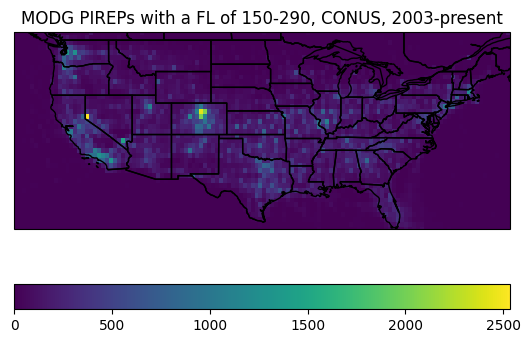

In [15]:
# "med" flight level
# pull lats and lons
low_lons = med_modg.LON
low_lats = med_modg.LAT

low_lats = np.array(low_lats.values, dtype='float')
low_lons = np.array(low_lons.values, dtype='float')

# create bins
xbins_conus = np.arange(-129, 25.25, 0.5)
ybins_conus = np.arange(-66, 50.5, 0.625)

hist, x, y = np.histogram2d(low_lons, low_lats, bins=(xbins_conus, ybins_conus))

# plot 
fig, ax = plt.subplots(subplot_kw = {'projection':ccrs.PlateCarree()})
ax.set_extent([-129,-66, 25, 50], crs=ccrs.PlateCarree())
cont = ax.pcolormesh(x, y, hist.transpose())
cb = fig.colorbar(cont, orientation='horizontal')

ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

plt.title("MODG PIREPs with a FL of 150-290, CONUS, 2003-present")
plt.show()

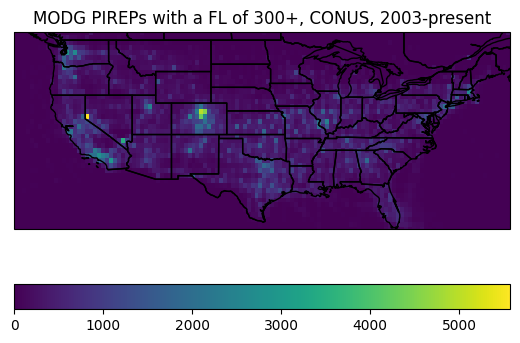

In [16]:
# "high" flight level
# pull lats and lons
low_lons = high_modg.LON
low_lats = high_modg.LAT

low_lats = np.array(low_lats.values, dtype='float')
low_lons = np.array(low_lons.values, dtype='float')

# create bins
xbins_conus = np.arange(-129, 25.25, 0.5)
ybins_conus = np.arange(-66, 50.5, 0.625)

hist, x, y = np.histogram2d(low_lons, low_lats, bins=(xbins_conus, ybins_conus))

# plot 
fig, ax = plt.subplots(subplot_kw = {'projection':ccrs.PlateCarree()})
ax.set_extent([-129,-66, 25, 50], crs=ccrs.PlateCarree())
cont = ax.pcolormesh(x, y, hist.transpose())
cb = fig.colorbar(cont, orientation='horizontal')

ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

plt.title("MODG PIREPs with a FL of 300+, CONUS, 2003-present")
plt.show()

## Group by Every 3 Hours, Pull Stats

In [18]:
# for the "low" flight levels

# pull decimal hours and datetimes
times = low_modg['Dec_hr']
datetime_vals = low_modg['DateTime']

# setup
day_hr = {}
counts = {}

for hr in range(0,24,3):
    day_hr[hr] = []
    counts[hr] = 0

last_hr = 0
for row in list(low_modg.iterrows()):
    # Do time check
    hr = row[1].Dec_hr
    #print(hr)
    if hr < last_hr:
        for hr in range (0,24,3):
            day_hr[hr].append(counts[hr])
            counts[hr] = 0

    # Sort report time
    if (hr >= 22.5) or (hr < 1.5):
        counts[0] += 1
    elif (hr >= 1.5) and (hr < 4.5):
        counts[3] += 1
    elif (hr >= 4.5) and (hr < 7.5):
        counts[6] += 1
    elif (hr >= 7.5) and (hr < 10.5):
        counts[9] += 1
    elif (hr >= 10.5) and (hr < 14.5):
        counts[12] += 1
    elif (hr >= 13.5) and (hr < 16.5):
        counts[15] += 1
    elif (hr >= 16.5) and (hr < 19.5):
        counts[18] += 1
    elif (hr >= 19.5) and (hr < 22.5):
        counts[21] += 1

    # Update time check
    last_hr = hr

for hr in range(0,24,3):
    print(len(day_hr[hr]), sum(day_hr[hr]))

715906 81277
715906 2
715906 0
715906 0
715906 3
715906 2
715906 10
715906 807466


In [19]:
# for the "medium" flight levels

# pull decimal hours and datetimes
times = med_modg['Dec_hr']
datetime_vals = med_modg['DateTime']

# setup
day_hr = {}
counts = {}

for hr in range(0,24,3):
    day_hr[hr] = []
    counts[hr] = 0

last_hr = 0
for row in list(med_modg.iterrows()):
    # Do time check
    hr = row[1].Dec_hr
    #print(hr)
    if hr < last_hr:
        for hr in range (0,24,3):
            day_hr[hr].append(counts[hr])
            counts[hr] = 0

    # Sort report time
    if (hr >= 22.5) or (hr < 1.5):
        counts[0] += 1
    elif (hr >= 1.5) and (hr < 4.5):
        counts[3] += 1
    elif (hr >= 4.5) and (hr < 7.5):
        counts[6] += 1
    elif (hr >= 7.5) and (hr < 10.5):
        counts[9] += 1
    elif (hr >= 10.5) and (hr < 14.5):
        counts[12] += 1
    elif (hr >= 13.5) and (hr < 16.5):
        counts[15] += 1
    elif (hr >= 16.5) and (hr < 19.5):
        counts[18] += 1
    elif (hr >= 19.5) and (hr < 22.5):
        counts[21] += 1

    # Update time check
    last_hr = hr

for hr in range(0,24,3):
    print(len(day_hr[hr]), sum(day_hr[hr]))

419309 47002
419309 3
419309 0
419309 0
419309 2
419309 1
419309 6
419309 471493


In [20]:
# for the "high" flight levels

# pull decimal hours and datetimes
times = high_modg['Dec_hr']
datetime_vals = high_modg['DateTime']

# setup
day_hr = {}
counts = {}

for hr in range(0,24,3):
    day_hr[hr] = []
    counts[hr] = 0

last_hr = 0
for row in list(high_modg.iterrows()):
    # Do time check
    hr = row[1].Dec_hr
    #print(hr)
    if hr < last_hr:
        for hr in range (0,24,3):
            day_hr[hr].append(counts[hr])
            counts[hr] = 0

    # Sort report time
    if (hr >= 22.5) or (hr < 1.5):
        counts[0] += 1
    elif (hr >= 1.5) and (hr < 4.5):
        counts[3] += 1
    elif (hr >= 4.5) and (hr < 7.5):
        counts[6] += 1
    elif (hr >= 7.5) and (hr < 10.5):
        counts[9] += 1
    elif (hr >= 10.5) and (hr < 14.5):
        counts[12] += 1
    elif (hr >= 13.5) and (hr < 16.5):
        counts[15] += 1
    elif (hr >= 16.5) and (hr < 19.5):
        counts[18] += 1
    elif (hr >= 19.5) and (hr < 22.5):
        counts[21] += 1

    # Update time check
    last_hr = hr

for hr in range(0,24,3):
    print(len(day_hr[hr]), sum(day_hr[hr]))

909633 101739
909633 5
909633 1
909633 1
909633 12
909633 7
909633 12
909633 1024097
